In [1]:
from news_scraper import article
import pandas as pd
from metrics import forecast
import numpy as np

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abhi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
money_control_articles = article.load_articles("money-control-articles-formatted")
economic_times_articles = article.load_articles("economic-times-articles-formatted")
articles = money_control_articles
articles.extend(economic_times_articles)
len(articles)

5665

In [3]:
content = []
for a in articles:
    if a.cleaned_content == "you can now subscribe to our economic times whatsapp channel":
        continue

    senti = a.sentiment()
    content.append({
        "timestamp": pd.to_datetime(a.market_timestamp),
        "content": a.cleaned_content,
        "pos_senti": senti["pos"],
        "neu_senti": senti["neu"],
        "neg_senti": senti["neg"],
        "compound_senti": senti["compound"],
    })
content = pd.DataFrame(content)
content

,timestamp,content,pos_senti,neu_senti,neg_senti,compound_senti
0,2024-02-20 12:16:00+05:30,e commerce company amazon on tuesday said it h...,0.095,0.894,0.012,0.8575
1,2024-03-28 09:15:00+05:30,reliance power on wednesday said its two subsi...,0.104,0.816,0.081,0.7579
2,2024-04-29 13:27:00+05:30,kundan green energy on monday said it has secu...,0.101,0.899,0.000,0.8807
3,2024-05-01 15:05:00+05:30,eicher motors ltd on wednesday said its arm ve...,0.000,1.000,0.000,0.0000
4,2024-08-05 12:36:00+05:30,the countrys largest airline indigo will launc...,0.015,0.985,0.000,0.2960
...,...,...,...,...,...,...
1937,2024-01-03 09:15:00+05:30,india s top technology companies which togethe...,0.146,0.854,0.000,0.9360
1938,2024-09-19 09:15:00+05:30,meta platforms won the dismissal of a lawsuit ...,0.102,0.825,0.073,0.6258
1939,2024-08-20 09:15:00+05:30,the government will soon come out with draft r...,0.014,0.986,0.000,0.2500
1940,2024-09-02 09:58:00+05:30,tech investor and author balaji srinivasan who...,0.045,0.939,0.017,0.5499


In [4]:
def create_sequences(data, X, time_steps=10):
    assert "Open" in data.columns, "Open not found in data"
    assert "High" in data.columns, "High not found in data"
    assert "Low" in data.columns, "Low not found in data"
    assert "Close" in data.columns, "Close not found in data"

    assert "timestamp" in X.columns, "timestamp not found in X"

    d = data[["Open", "High", "Low", "Close"]]

    no_data_indices = []

    X_seq = []
    for i in X.index:
        end_timestamp = X["timestamp"][i]
        idx = data.index[data['Datetime'] == end_timestamp].tolist()[0]

        sub = d[idx - time_steps:idx]
        if len(sub) == 0:
            no_data_indices.append(i)
            continue

        X_seq.append(sub)
    
    return np.array(X_seq), no_data_indices

In [5]:
stock_data = pd.read_csv("stock-prices/ASHOKLEY.NS.csv")
span_1 = forecast.precise_forecast(stock_data, span=1)
span_2 = forecast.precise_forecast(stock_data, span=2)
span_5 = forecast.precise_forecast(stock_data, span=5)
span_10 = forecast.precise_forecast(stock_data, span=10)
span_30 = forecast.precise_forecast(stock_data, span=30)
stock_data = pd.concat([stock_data, span_1, span_2, span_5, span_10, span_30], axis=1)
stock_data.dropna(inplace=True)
stock_data["Datetime"] = pd.to_datetime(stock_data["Datetime"])
stock_data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,precise_forecast_1,precise_forecast_2,precise_forecast_5,precise_forecast_10,precise_forecast_30
0,2024-08-12 09:15:00+05:30,249.949997,250.850006,249.899994,250.250000,0,0.0,0.0,250.399994,251.350006,251.199997,251.800003,252.300003
1,2024-08-12 09:16:00+05:30,250.800003,250.949997,250.050003,250.399994,88855,0.0,0.0,251.350006,251.449997,251.600006,252.100006,252.250000
2,2024-08-12 09:17:00+05:30,250.399994,251.350006,250.399994,251.350006,131111,0.0,0.0,251.449997,251.050003,252.399994,252.399994,252.600006
3,2024-08-12 09:18:00+05:30,251.350006,251.500000,250.949997,251.449997,111317,0.0,0.0,251.050003,251.199997,252.449997,252.350006,253.149994
4,2024-08-12 09:19:00+05:30,251.300003,251.600006,251.050003,251.050003,265162,0.0,0.0,251.199997,251.600006,252.100006,252.250000,253.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,2024-09-23 14:55:00+05:30,235.699997,235.800003,235.649994,235.649994,28636,0.0,0.0,235.550003,235.550003,235.500000,235.250000,237.350006
11194,2024-09-23 14:56:00+05:30,235.699997,235.750000,235.550003,235.550003,50112,0.0,0.0,235.550003,235.399994,235.149994,235.100006,237.350006
11195,2024-09-23 14:57:00+05:30,235.600006,235.649994,235.500000,235.550003,13981,0.0,0.0,235.399994,235.449997,235.350006,235.949997,237.250000
11196,2024-09-23 14:58:00+05:30,235.500000,235.500000,235.250000,235.399994,70892,0.0,0.0,235.449997,235.500000,235.199997,236.000000,237.300003


In [6]:
data = pd.merge(stock_data, content, left_on='Datetime', right_on='timestamp', how='inner')
data["market_minutes"] = data["timestamp"].apply(lambda x: (x.timestamp() / 60) % 1440 - 225)
data.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,precise_forecast_1,precise_forecast_2,precise_forecast_5,precise_forecast_10,precise_forecast_30,timestamp,content,pos_senti,neu_senti,neg_senti,compound_senti,market_minutes
0,2024-08-12 09:15:00+05:30,249.949997,250.850006,249.899994,250.25,0,0.0,0.0,250.399994,251.350006,251.199997,251.800003,252.300003,2024-08-12 09:15:00+05:30,chief executives of coforge and persistent sys...,0.062,0.938,0.000,0.8316,0.0
1,2024-08-12 09:15:00+05:30,249.949997,250.850006,249.899994,250.25,0,0.0,0.0,250.399994,251.350006,251.199997,251.800003,252.300003,2024-08-12 09:15:00+05:30,it firm coforge got a second supplementary not...,0.053,0.932,0.016,0.3919,0.0
2,2024-08-12 09:15:00+05:30,249.949997,250.850006,249.899994,250.25,0,0.0,0.0,250.399994,251.350006,251.199997,251.800003,252.300003,2024-08-12 09:15:00+05:30,hclsoftware the software business division of ...,0.122,0.867,0.011,0.9628,0.0
3,2024-08-12 09:15:00+05:30,249.949997,250.850006,249.899994,250.25,0,0.0,0.0,250.399994,251.350006,251.199997,251.800003,252.300003,2024-08-12 09:15:00+05:30,mumbai with it companies gradually coming out ...,0.092,0.901,0.007,0.9325,0.0
4,2024-08-12 09:15:00+05:30,249.949997,250.850006,249.899994,250.25,0,0.0,0.0,250.399994,251.350006,251.199997,251.800003,252.300003,2024-08-12 09:15:00+05:30,continuing its restructuring spree under new c...,0.121,0.879,0.000,0.9837,0.0


In [7]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [8]:
X = data[["market_minutes", "Open", "High", "Low", "Close", "Volume", "content", "pos_senti", "neu_senti", "neg_senti", "compound_senti", "timestamp"]]
y = data[["precise_forecast_1", "precise_forecast_2", "precise_forecast_5", "precise_forecast_10", "precise_forecast_30"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640, 12), (72, 12), (640, 5), (72, 5))

In [9]:
def max_content_length(data: pd.DataFrame) -> int:
    assert "content" in data.columns, "Content not found in data frame"

    m = 0
    for row in data["content"]:
        m = m if len(row) < m else len(row)
    return m

In [10]:
def neural_net_input(data, X, y):
    stock_seq, no_data_idxs = create_sequences(data, X)
    filtered_X = X[~X.index.isin(no_data_idxs)]
    filtered_y = y[~y.index.isin(no_data_idxs)]
    senti = filtered_X[["pos_senti", "neu_senti", "neg_senti", "compound_senti"]]
    content = filtered_X[["content"]]

    return stock_seq, senti, content, filtered_y

In [11]:
stock_seq_train, senti_train, content_train, labels_train = neural_net_input(stock_data, X_train, y_train)
stock_seq_train.shape, senti_train.shape, content_train.shape, labels_train.shape

((635, 10, 4), (635, 4), (635, 1), (635, 5))

In [12]:
vectorizer = tf.keras.layers.TextVectorization(
    output_mode="int",
    output_sequence_length=max_content_length(data),
    name="text_vectorizer"
)
vectorizer.adapt(data["content"])
vectorizer.vocabulary_size()

2024-10-07 20:11:59.290660: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-07 20:11:59.290684: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-07 20:11:59.290689: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-07 20:11:59.290719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-07 20:11:59.290733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-10-07 20:11:59.369678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10904

In [13]:
def add_forecast_layer(layer, span):
    dense1 = tf.keras.layers.Dense(64, activation="relu", name=f"dense{span}_1")(layer)
    dense2 = tf.keras.layers.Dense(32, activation="relu", name=f"dense{span}_2")(dense1)
    output = tf.keras.layers.Dense(1, activation="relu", name=f"output{span}")(dense2)
    return output

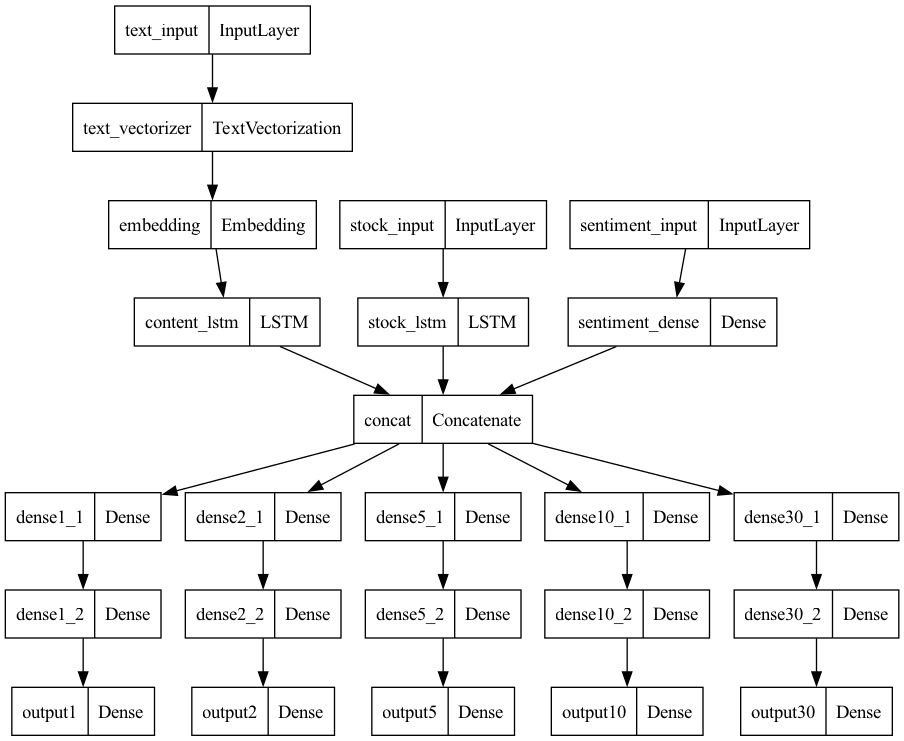

In [14]:
tf.random.set_seed(42)

stock_lstm_input = tf.keras.layers.Input(shape=(10, 4), name="stock_input")
stock_lstm = tf.keras.layers.LSTM(64, name="stock_lstm")(stock_lstm_input)

sentiment_input = tf.keras.layers.Input(shape=(4, ), name="sentiment_input")
sentiment_dense = tf.keras.layers.Dense(32, activation="relu", name="sentiment_dense")(sentiment_input)

content_input = tf.keras.layers.Input(shape=(1, ), dtype=tf.string, name="text_input")
content_vectorized = vectorizer(content_input)
embedding = tf.keras.layers.Embedding(input_dim=vectorizer.vocabulary_size(), output_dim=128, name="embedding")(content_vectorized)
content_lstm = tf.keras.layers.LSTM(32, name="content_lstm")(embedding)

concat = tf.keras.layers.Concatenate(name="concat")([stock_lstm, sentiment_dense, content_lstm])

output1 = add_forecast_layer(concat, 1)
output2 = add_forecast_layer(concat, 2)
output5 = add_forecast_layer(concat, 5)
output10 = add_forecast_layer(concat, 10)
output30 = add_forecast_layer(concat, 30)

model = tf.keras.Model(
    inputs=[stock_lstm_input, sentiment_input, content_input],
    outputs=[output1, output2, output5, output10, output30]
)

model.compile(optimizer="adam", loss="mae")

tf.keras.utils.plot_model(model)

In [15]:
model.fit(
    [stock_seq_train, senti_train, content_train],
    labels_train,
    epochs=25,
    validation_split=0.1
)

Epoch 1/25


2024-10-07 20:12:01.501601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:12:01.927551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:12:01.929427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:12:02.497279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:12:02.525456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 1244.2399 - output1_loss: 248.5111 - output2_loss: 248.4148 - output5_loss: 251.1387 - output10_loss: 248.2047 - output30_loss: 247.9704

2024-10-07 20:12:10.169314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:12:10.287733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:12:10.292840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 10s 451ms/step - loss: 1244.2399 - output1_loss: 248.5111 - output2_loss: 248.4148 - output5_loss: 251.1387 - output10_loss: 248.2047 - output30_loss: 247.9704 - val_loss: 1236.4747 - val_output1_loss: 246.5620 - val_output2_loss: 246.9046 - val_output5_loss: 251.5873 - val_output10_loss: 245.8932 - val_output30_loss: 245.5276
Epoch 2/25
18/18 [==============================] - 7s 391ms/step - loss: 1215.5883 - output1_loss: 242.2975 - output2_loss: 242.1121 - output5_loss: 250.8246 - output10_loss: 239.9496 - output30_loss: 240.4045 - val_loss: 1191.3711 - val_output1_loss: 237.6651 - val_output2_loss: 236.5033 - val_output5_loss: 251.1189 - val_output10_loss: 232.1940 - val_output30_loss: 233.8898
Epoch 3/25
18/18 [==============================] - 7s 378ms/step - loss: 1150.6016 - output1_loss: 229.8596 - output2_loss: 227.1682 - output5_loss: 250.5677 - output10_loss: 219.9271 - output30_loss: 223.0790 - val_loss: 1098.3571 - val_output1_los

In [16]:
stock_seq_test, senti_test, content_test, labels_test = neural_net_input(stock_data, X_test, y_test)
model.evaluate([stock_seq_test, senti_test, content_test], labels_test)

2024-10-07 20:15:04.289641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:15:04.415607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-07 20:15:04.420031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 699ms/step - loss: 34.4528 - output1_loss: 6.8571 - output2_loss: 6.8687 - output5_loss: 6.9316 - output10_loss: 6.9038 - output30_loss: 6.8916


[34.452754974365234,
 6.857070446014404,
 6.868662357330322,
 6.931639671325684,
 6.9037675857543945,
 6.8916120529174805]